In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_1 = pd.read_csv('../data/kernels.csv')
df_2 = pd.read_csv('../data/images.csv')
display(df_1.head())
display(df_2.head())

,Kernel Radius,Average Time(ms),Confidence Interval
0,10,166.708422,5.016311
1,30,218.529129,8.020811
2,50,261.557484,3.996760
3,70,355.366707,10.532907
4,90,467.594957,6.769626


,Image dimension,Average Time(ms),Confidence Interval
0,500,164.176273,16.100700
1,700,211.482096,11.096245
2,900,253.310156,12.207277
3,1100,317.317295,16.253410
4,1300,374.634838,5.613904


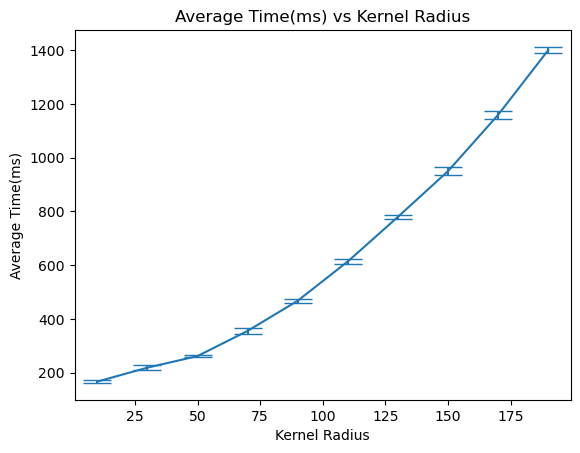

In [3]:
plt.plot(df_1['Kernel Radius'], df_1['Average Time(ms)'])
plt.errorbar(df_1['Kernel Radius'], df_1['Average Time(ms)'],
              yerr=df_1['Confidence Interval'], fmt='none', capsize=10)
plt.xlabel('Kernel Radius')
plt.ylabel('Average Time(ms)')
plt.title('Average Time(ms) vs Kernel Radius')
plt.savefig("../figures/plot1.png", dpi=500, bbox_inches='tight', transparent=True)

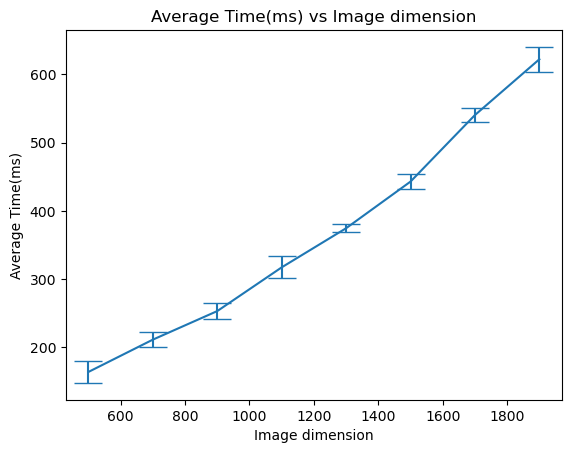

In [4]:
plt.plot(df_2['Image dimension'], df_2['Average Time(ms)'])
plt.errorbar(df_2['Image dimension'], df_2['Average Time(ms)'],
              yerr=df_2['Confidence Interval'], fmt='none', capsize=10)
plt.xlabel('Image dimension')
plt.ylabel('Average Time(ms)')
plt.title('Average Time(ms) vs Image dimension')
plt.savefig("../figures/plot2.png", dpi=500, bbox_inches='tight', transparent=True)

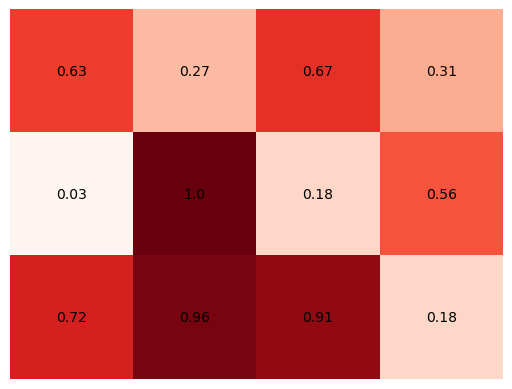

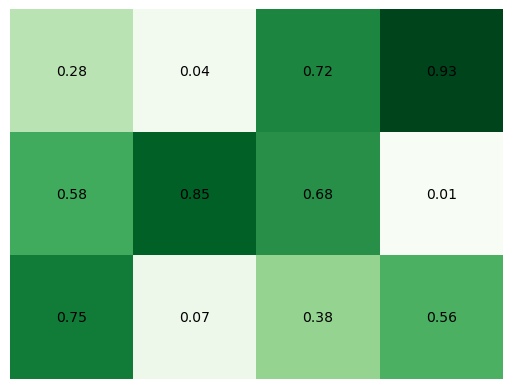

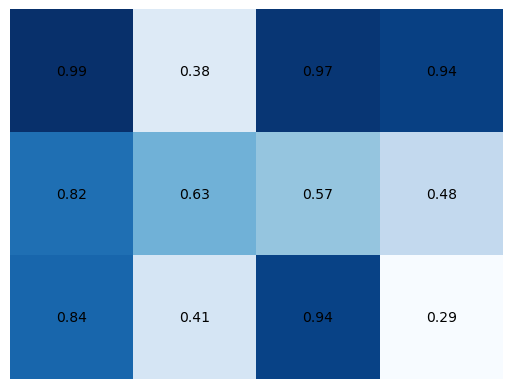

In [5]:
for cmap in ['Reds', 'Greens', 'Blues']:
    matrix = np.random.rand(3, 4)
    plt.figure()
    plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    for i in range(3):
        for j in range(4):
            plt.text(j, i, round(matrix[i, j], 2), ha='center', va='center')
    plt.axis('off')
    plt.savefig(f"../figures/{cmap}.png", dpi=500, bbox_inches='tight', transparent=True)

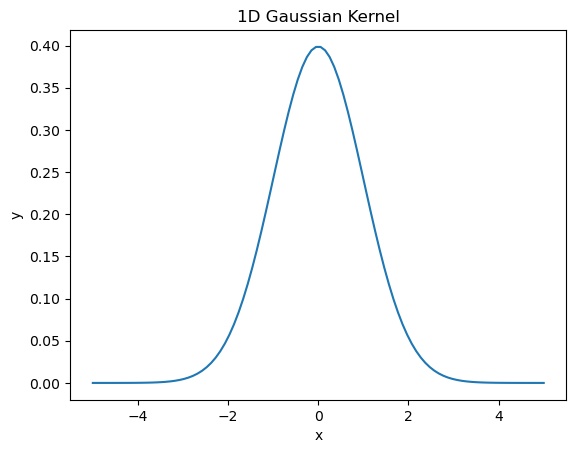

In [6]:
plt.figure()
x = np.linspace(-5, 5, 100)
y = np.exp(-x**2/2)/np.sqrt(2*np.pi)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('1D Gaussian Kernel')
plt.savefig("../figures/Gaussian_1D.png", dpi=500, bbox_inches='tight', transparent=True)

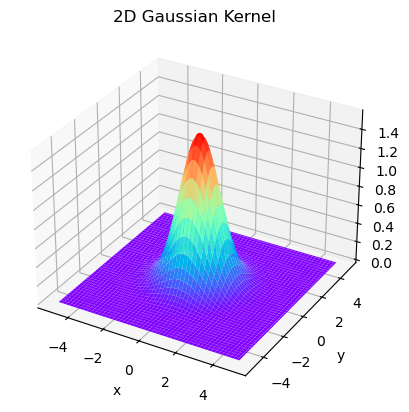

In [7]:
plt.figure()
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2+Y**2)/2)/2*np.pi
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='rainbow', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('2D Gaussian Kernel')
plt.savefig("../figures/Gaussian_2D_3D.png", dpi=500, bbox_inches='tight', transparent=True)

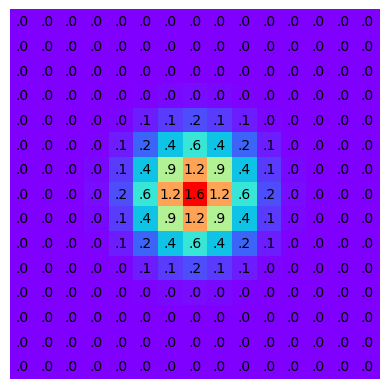

In [8]:
x = np.linspace(-5, 5, 15)
y = np.linspace(-5, 5, 15)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2+Y**2)/2)/2*np.pi

plt.figure()
plt.imshow(Z, cmap='rainbow')
for i in range(15):
    for j in range(15):
        plt.text(j, i, f"{Z[i, j]:.1f}".lstrip('0'), ha='center', va='center')
plt.axis('off')
plt.savefig("../figures/Gaussian_2D_2D.png", dpi=500, bbox_inches='tight', transparent=True)

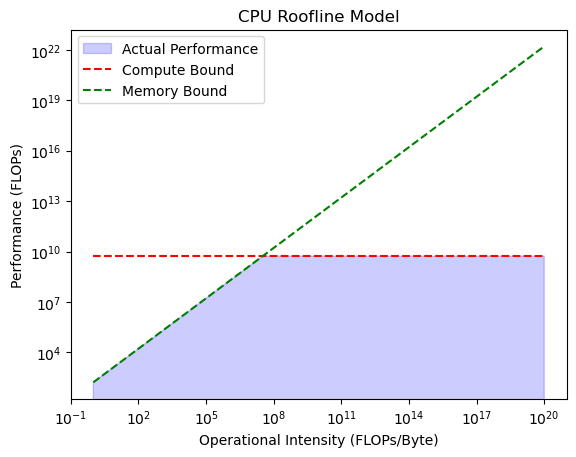

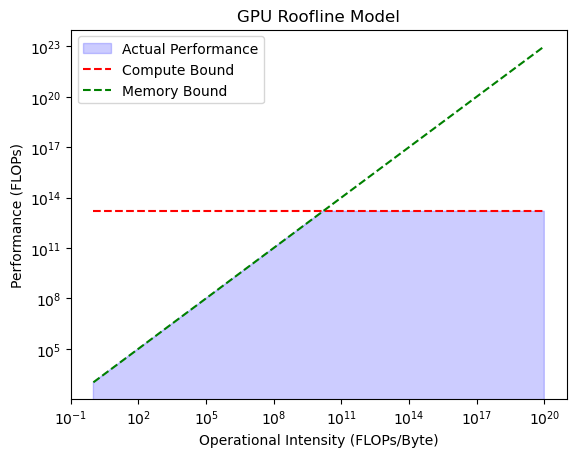

In [9]:
def plot_roofline(peak_flops, memory_bandwidth, title):
    memory_bandwidth_flops = memory_bandwidth * 4
    x = np.logspace(0, 20, 1000)
    compute_bound = np.full_like(x, peak_flops)
    memory_bound = x * memory_bandwidth_flops
    actual_performance = np.minimum(compute_bound, memory_bound)

    plt.figure()
    plt.fill_between(x, actual_performance, color="b", alpha=0.2, label="Actual Performance")
    plt.loglog(x, compute_bound, '--', label="Compute Bound", color="r")
    plt.loglog(x, memory_bound, '--', label="Memory Bound", color="g")

    plt.xlabel("Operational Intensity (FLOPs/Byte)")
    plt.ylabel("Performance (FLOPs)")
    plt.title(title)
    plt.legend()
    plt.savefig(f"../figures/{title}.png", dpi=500, bbox_inches='tight', transparent=True)

# https://ark.intel.com/content/www/us/en/ark/products/232135/intel-core-i913900h-processor-24m-cache-up-to-5-40-ghz.html
# https://www.techpowerup.com/gpu-specs/geforce-rtx-4070.c3924
cpu_peak_flops = 5.4e9  # 5.4Gflop/s
cpu_memory_bandwidth = 41.6 # 41.6 GB/s
plot_roofline(cpu_peak_flops, cpu_memory_bandwidth, "CPU Roofline Model")

gpu_peak_flops = 15.62e12  # 15.62 Tflop/s
gpu_memory_bandwidth = 256 # 256 GB/s
plot_roofline(gpu_peak_flops, gpu_memory_bandwidth, "GPU Roofline Model")